# Qiskit 101

# Import standard Qiskit libraries and Load the account

In [1]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# X Gate

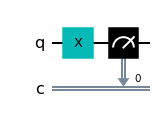

In [2]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.measure(0,0)
circuit.draw(output='mpl')

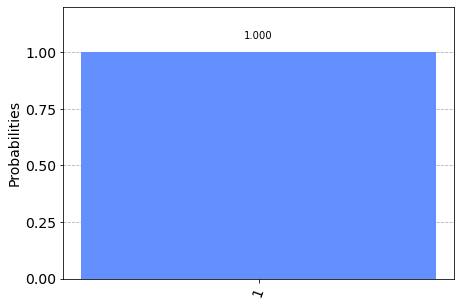

In [3]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circuit,backend=backend, shots =1000)
counts = job.result().get_counts()
plot_histogram(counts)

# Hadamard Gate

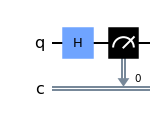

In [4]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.measure(0,0)
circuit.draw(output='mpl')

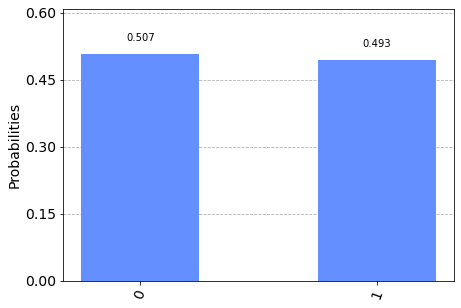

In [5]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circuit,backend=backend, shots =1000)
counts = job.result().get_counts()
plot_histogram(counts)

# Bell State

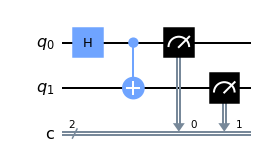

In [6]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

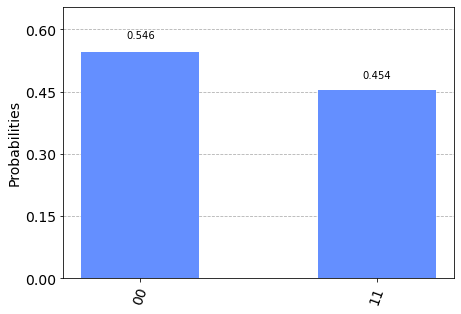

In [7]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circuit,backend=backend, shots =1000)
counts = job.result().get_counts()
plot_histogram(counts)

In [8]:
backend = Aer.get_backend("statevector_simulator")
job = execute(circuit,backend=backend, shots =1000)
results = job.result()
outputstate = results.get_statevector(circuit, decimals=3)
print(outputstate)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


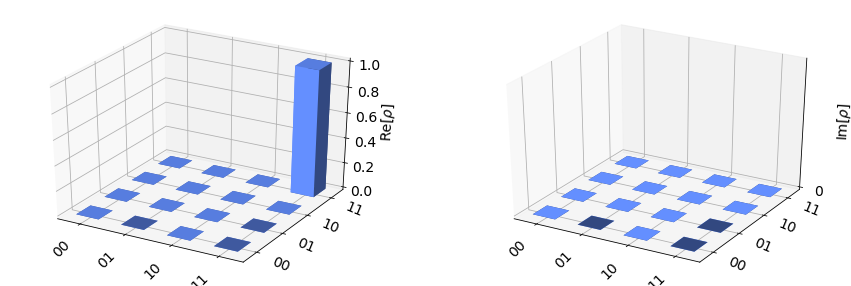

In [9]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

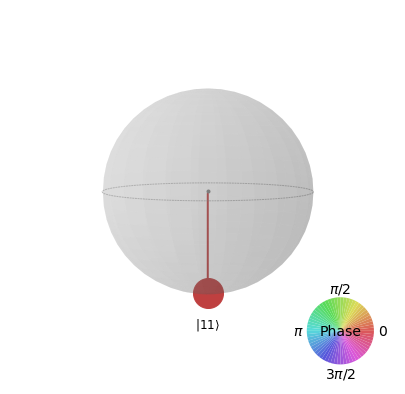

In [10]:
plot_state_qsphere(outputstate)

# Half Adder

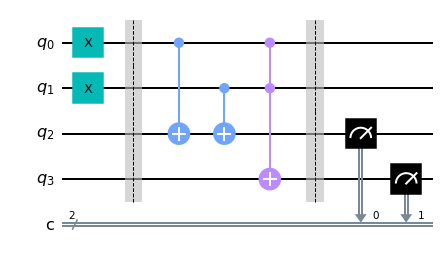

In [11]:
qc = QuantumCircuit(4,2)

# Encode Inputs in qubits 0 and 1
qc.x(0) 
qc.x(1) 
qc.barrier() 


# XOR the inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)
# AND the inputs on qubit 3
qc.ccx(0,1,3)
qc.barrier()

qc.measure(2,0) # XOR value
qc.measure(3,1) # AND value

qc.draw(output='mpl')

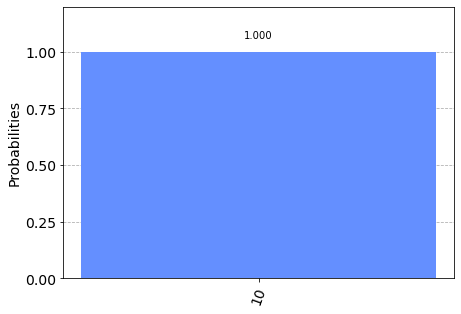

In [12]:
backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots =1000)
counts = job.result().get_counts()
plot_histogram(counts)

# Running on a Quantum Computer

In [13]:
from qiskit import IBMQ

IBMQ.save_account('27194fe9616d34956326165bafaf16cea432eb908231888ac8f46dc7c39c11800225edb444d0c77993e25f823caf40853f62454ca3360fe8478518940bd2c27b')

configrc.store_credentials:WARNING:2021-10-18 23:49:54,150: Credentials already present. Set overwrite=True to overwrite.


In [14]:
provider = IBMQ.load_account()

In [15]:
backend = provider.get_backend("ibmq_belem")

In [16]:
job = execute(qc,backend=backend,shots =1000)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


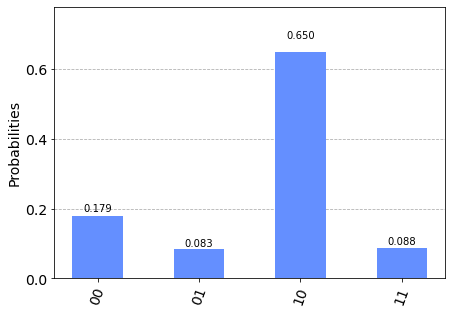

In [17]:
counts = job.result().get_counts()
plot_histogram(counts)

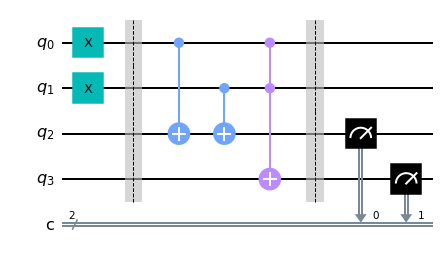

In [18]:
res = transpile(qc)
res.draw(output='mpl')

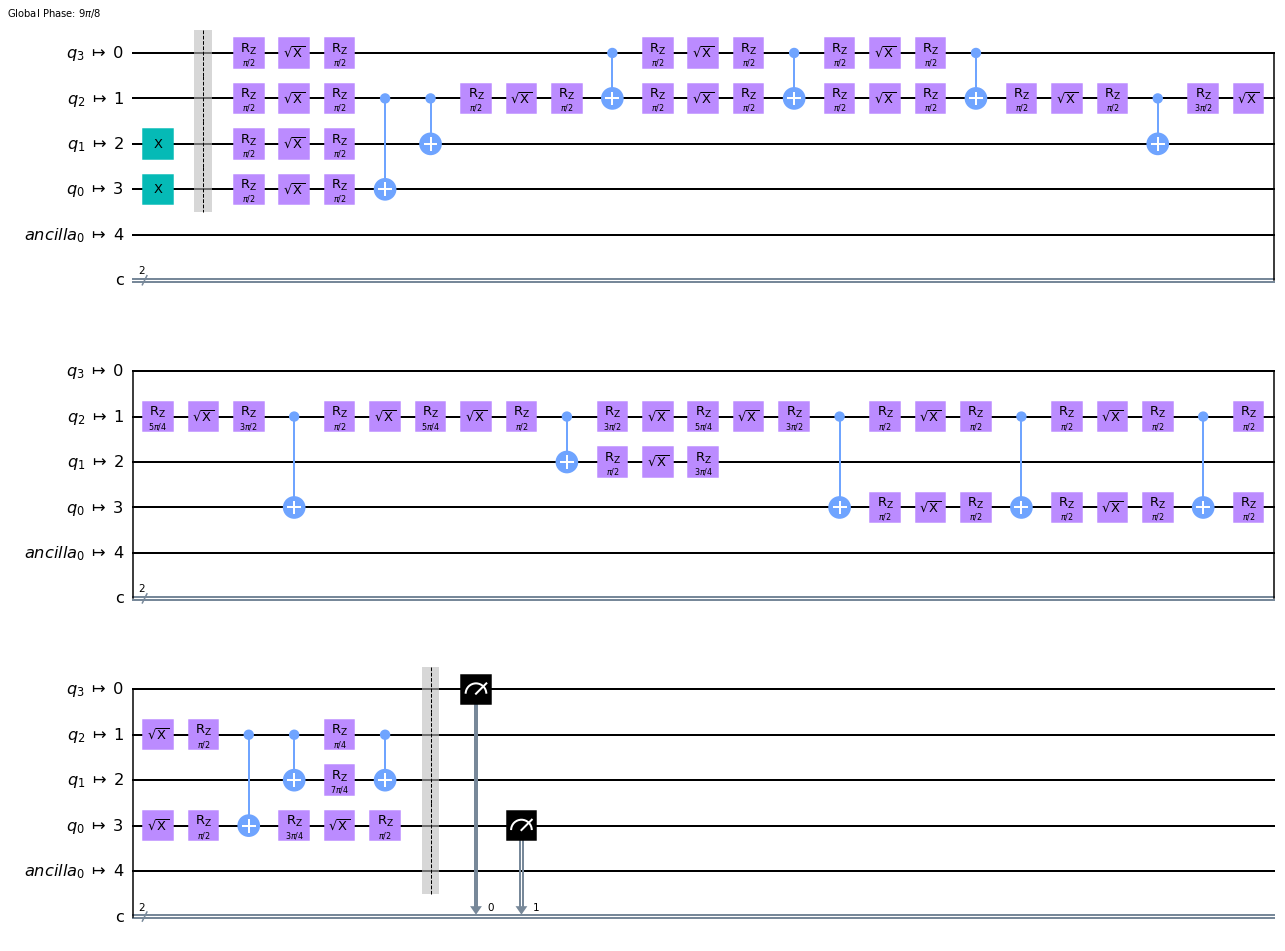

In [19]:
res = transpile(qc, coupling_map=[[0,1], [1,2], [1,3], [3,4]], basis_gates=['id', 'rz', 'sx', 'cx', 'x'])
res.draw(output='mpl')

# Random Number Generator

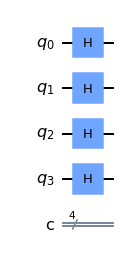

In [20]:
qc = QuantumCircuit(4,4)
qc.h(range(4))
qc.draw(output='mpl')

In [21]:
qc.measure(range(4),range(4))

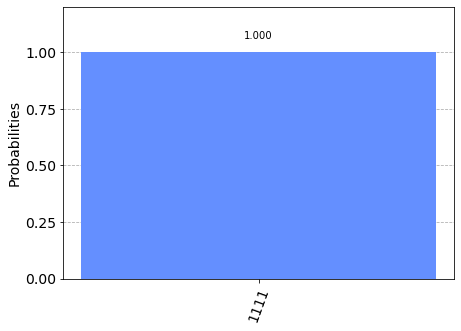

In [22]:
backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots =1)
counts = job.result().get_counts()
plot_histogram(counts)

In [23]:
job = execute(qc,backend=backend,shots =1)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


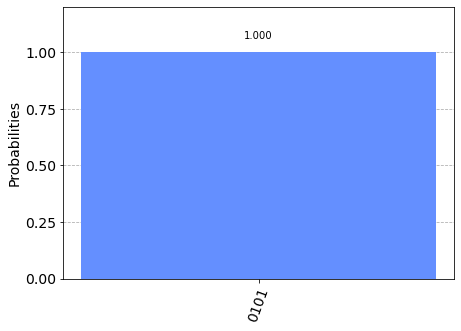

In [24]:
counts = job.result().get_counts()
plot_histogram(counts)